In [ ]:
import os
os.chdir('../../')

In [1]:
from NN.DENSE import DENSE, DataCollector, Optimizer
from NN.common import *
import matplotlib.pyplot as plt
import numpy as np
from lib import dataset_loader, dataset_info, dataset_preprocessing, plot_utility
import seaborn as sns

<h1>MONK 1</h1>

17 features [0, 1]
un solo output [-1, 1]

In [2]:
DATASET = dataset_info.Dataset.MONK_1
X, y, val_X, val_y = dataset_loader.LoadDataset(DATASET)
# preprocessing
X, y = dataset_preprocessing.preprocess_nn(DATASET, X, y)
val_X, val_y = dataset_preprocessing.preprocess_nn(DATASET, val_X, val_y)

def score_function(out,target):
    return accuracy(out,target,ClassificationPostprocessing.THRESHOLD,threshold=0.0,positive_check_value=1, negative_check_value=-1)


<h2>Test di convergenza</h2>
Monk non è linearmente separabile

Reached max number of epochs


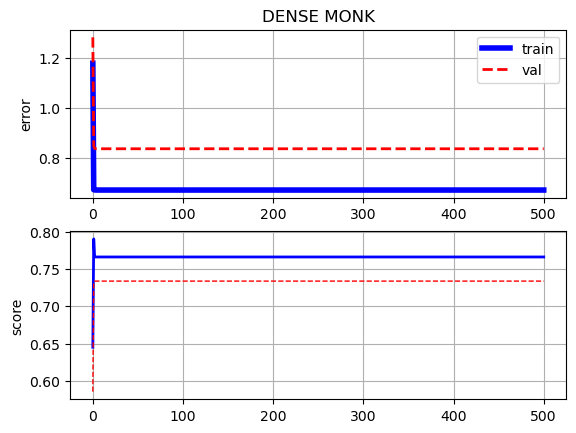

final result error 0.674 score 0.766


In [6]:
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : [[]],
    "momentum" : [0.9],
    'learning_rate': [0.5],
    'regularization': [0],
    'epochs' : [500],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}
mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data()
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
plot_utility.plot_single_learning_curve("DENSE MONK",tr_error_list[0],val_error_list[0],tr_score_list[0],val_score_list[0])
print("final result error {:.3f} score {:.3f}".format(tr_error_list[0][-1],tr_score_list[0][-1]))
print("val result error {:.3f} score {:.3f}".format(val_error_list[0][-1],val_score_list[0][-1]))

Si può convergere a 0 sia di training error che di test error con pochi nodi

Reached max number of epochs


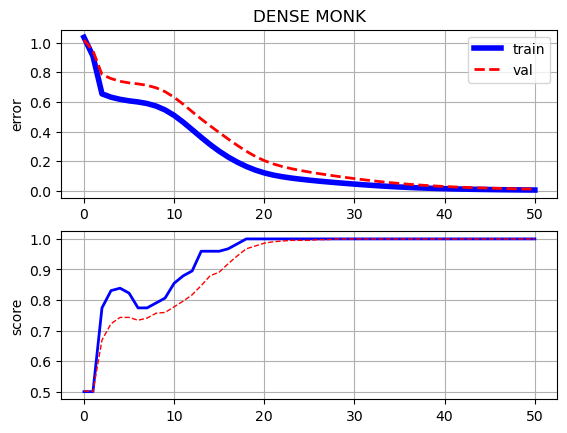

final result error 0.005 score 1.000


In [3]:
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : [[(5,ActivationFunction.SIGMOID)]],
    "momentum" : [0.9],
    'learning_rate': [1.0],
    'regularization': [0],
    'epochs' : [50],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}
mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data()
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
plot_utility.plot_single_learning_curve("DENSE MONK",tr_error_list[0],val_error_list[0],tr_score_list[0],val_score_list[0])
print("final result error {:.3f} score {:.3f}".format(tr_error_list[0][-1],tr_score_list[0][-1]))
print("val result error {:.3f} score {:.3f}".format(val_error_list[0][-1],val_score_list[0][-1]))

<h2>Early stopping</h2>

Training error did not improve and delta was small for 10 epochs


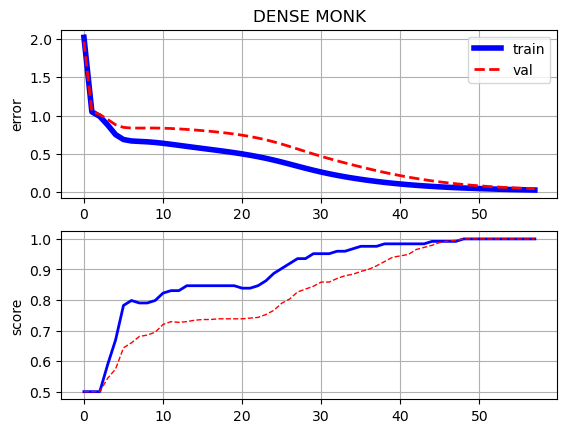

final result error 0.024 score 1.000


In [7]:
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : [[(5,ActivationFunction.SIGMOID)]],
    'output_function': [ActivationFunction.LINEAR],
    "momentum" : [0.9],
    'learning_rate': [0.5],
    'regularization': [0],
    'train_patience': [10],
    'train_min_improvement': [0.005],
    'epochs' : [600],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}
mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data()
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
plot_utility.plot_single_learning_curve("DENSE MONK",tr_error_list[0],val_error_list[0],tr_score_list[0],val_score_list[0])
print("final result error {:.3f} score {:.3f}".format(tr_error_list[0][-1],tr_score_list[0][-1]))


<h2>Differenti funzioni di attivazione nello strato interno</h2>

Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs


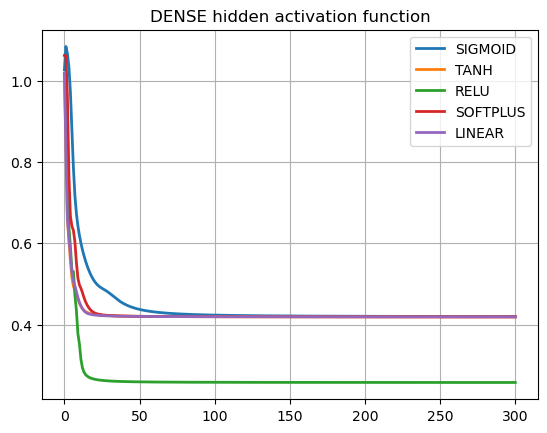

SIGMOID val error 0.668 score 0.833
TANH val error 0.667 score 0.833
RELU val error 0.334 score 0.917
SOFTPLUS val error 0.667 score 0.833
LINEAR val error 0.667 score 0.833


In [25]:
var_parameter = [[(5,ActivationFunction.SIGMOID)],[(5,ActivationFunction.TANH)],[(5,ActivationFunction.RELU)],[(5,ActivationFunction.SOFTPLUS)],[(5,ActivationFunction.LINEAR)]]
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : var_parameter,
    'output_function': [ActivationFunction.TANH],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'seed': [0],
    'regularization': [0],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function],
    'weights_amplitude' : [0.4]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['hidden_layers']
    return f[0][1].name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
run_metadata = mt.get_run_metadata()
# focus on low values to better see the differences
plot_utility.plot_multiple_learning_curves("DENSE hidden activation function",run_metadata,tr_error_list)
for i in range(len(var_parameter)):
    print("{} val error {:.3f} score {:.3f}".format(var_parameter[i][0][1].name,val_error_list[i][-1],val_score_list[i][-1]))

HIDDEN_func:  SIGMOID


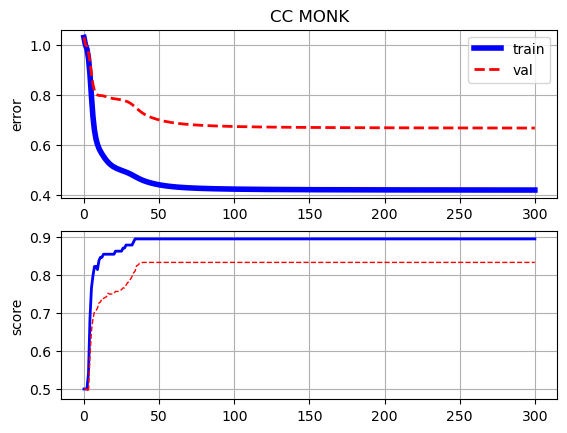

final result: train_error: 0.42013361430880714; val_error: 0.6680127144979637; train_score 0.8951612903225806; val_score 0.8333333333333334;
--------------------------------
HIDDEN_func:  TANH


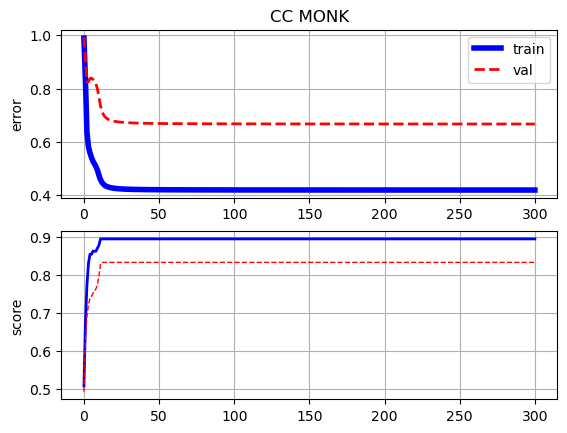

final result: train_error: 0.4194828509456487; val_error: 0.6668885505271974; train_score 0.8951612903225806; val_score 0.8333333333333334;
--------------------------------
HIDDEN_func:  RELU


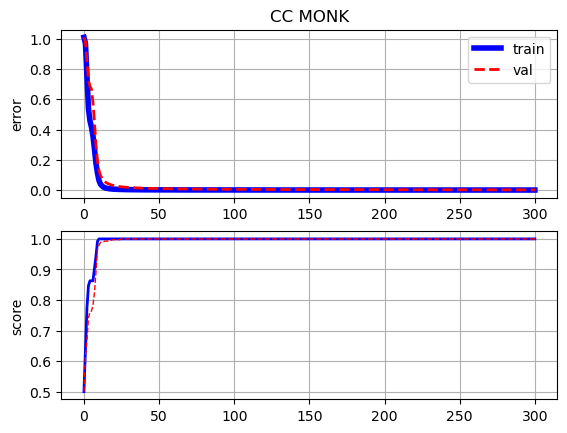

final result: train_error: 0.00012316786476350734; val_error: 0.0014384556098852744; train_score 1.0; val_score 1.0;
--------------------------------
HIDDEN_func:  SOFTPLUS


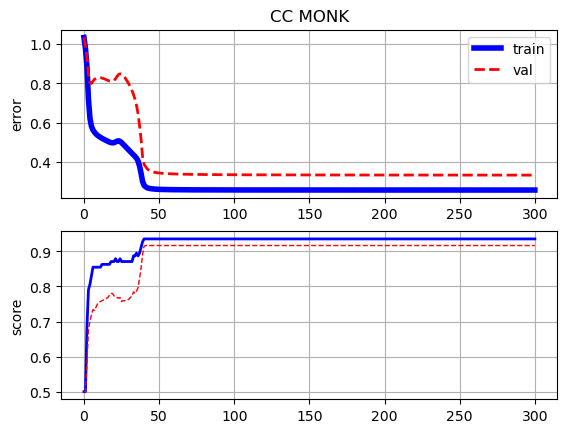

final result: train_error: 0.25815683921400595; val_error: 0.3339406903316128; train_score 0.9354838709677419; val_score 0.9166666666666666;
--------------------------------
HIDDEN_func:  LINEAR


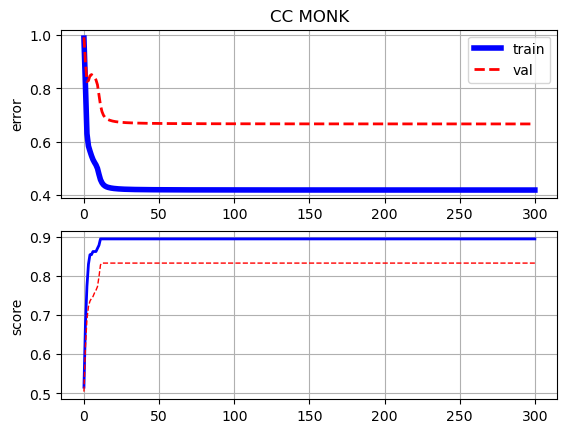

final result: train_error: 0.41946950808025235; val_error: 0.6668708376516292; train_score 0.8951612903225806; val_score 0.8333333333333334;
--------------------------------


In [18]:
for i in range(len(var_parameter)):
    print("HIDDEN_func: ", var_parameter[i][0][1].name)
    plot_utility.plot_single_learning_curve("DENSE MONK",tr_error_list[i],val_error_list[i],tr_score_list[i],val_score_list[i])
    print("final result: train_error: {}; val_error: {}; train_score {}; val_score {};".format(tr_error_list[i][-1], val_error_list[i][-1], tr_score_list[i][-1], val_score_list[i][-1]))
    print("--------------------------------")

### Check if this is given by initializations

In [26]:
var_parameter = [[(5,ActivationFunction.SIGMOID)],[(5,ActivationFunction.TANH)],[(5,ActivationFunction.RELU)],[(5,ActivationFunction.SOFTPLUS)],[(5,ActivationFunction.LINEAR)]]
RUN_COUNT = 5
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : var_parameter,
    'output_function': [ActivationFunction.TANH],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'seed': [i for i in range(RUN_COUNT)],
    'regularization': [0],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function],
    'weights_amplitude' : [0.4]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['hidden_layers']
    return f[0][1].name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()

Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs


In [ ]:
res = mt.sensitivity_analysis(["hidden_layers"])
res

{'tr_error_mean': array([3.87973718e-01, 2.19613114e-01, 2.08590128e-04, 2.19528253e-01,
       4.19467101e-01]), 'val_error_mean': array([0.60149436, 0.33452044, 0.00089713, 0.339497  , 0.66686525]), 'tr_score_mean': array([0.90322581, 0.94516129, 1.        , 0.94516129, 0.89516129]), 'val_score_mean': array([0.85      , 0.91666667, 1.        , 0.91481481, 0.83333333]), 'tr_error_std': array([6.42213886e-02, 1.88469384e-01, 4.45231240e-05, 1.88467114e-01,
       5.83840482e-06]), 'val_error_std': array([1.32624869e-01, 2.97299242e-01, 6.01166469e-04, 2.91681048e-01,
       1.26532902e-05]), 'tr_score_std': array([0.01612903, 0.04713432, 0.        , 0.04713432, 0.        ]), 'val_score_std': array([0.03333333, 0.0745356 , 0.        , 0.07253021, 0.        ]), 'global_tr_error_mean': 0.24935815531249067, 'global_val_error_mean': 0.38865483530910583, 'global_tr_score_mean': 0.937741935483871, 'global_val_score_mean': 0.9029629629629629, 'global_tr_error_std': 0.19347680722611077, 'global

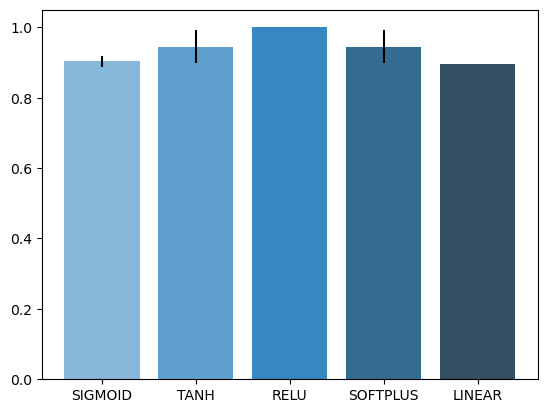

In [27]:
plt.bar([el[0][1].name for el in params['hidden_layers']], res["tr_score_mean"], yerr = res["tr_score_std"], color = sns.color_palette("Blues_d", len(params['hidden_layers'])))
plt.title("DENSE train score over hidden functions")
plt.show()

{'tr_error_mean': array([3.87973718e-01, 2.19613114e-01, 2.08590128e-04, 2.19528253e-01,
       4.19467101e-01]), 'val_error_mean': array([0.60149436, 0.33452044, 0.00089713, 0.339497  , 0.66686525]), 'tr_score_mean': array([0.90322581, 0.94516129, 1.        , 0.94516129, 0.89516129]), 'val_score_mean': array([0.85      , 0.91666667, 1.        , 0.91481481, 0.83333333]), 'tr_error_std': array([6.42213886e-02, 1.88469384e-01, 4.45231240e-05, 1.88467114e-01,
       5.83840482e-06]), 'val_error_std': array([1.32624869e-01, 2.97299242e-01, 6.01166469e-04, 2.91681048e-01,
       1.26532902e-05]), 'tr_score_std': array([0.01612903, 0.04713432, 0.        , 0.04713432, 0.        ]), 'val_score_std': array([0.03333333, 0.0745356 , 0.        , 0.07253021, 0.        ]), 'global_tr_error_mean': 0.24935815531249067, 'global_val_error_mean': 0.38865483530910583, 'global_tr_score_mean': 0.937741935483871, 'global_val_score_mean': 0.9029629629629629, 'global_tr_error_std': 0.19347680722611077, 'global

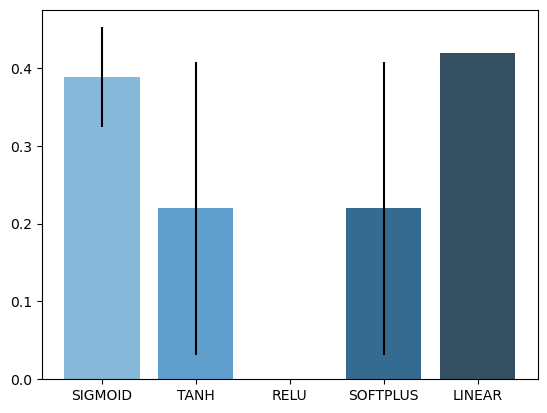

In [28]:
plt.bar([el[0][1].name for el in params['hidden_layers']], res["tr_error_mean"], yerr = res["tr_error_std"], color = sns.color_palette("Blues_d", len(params['hidden_layers'])))
plt.title("DENSE train error over hidden functions")
plt.show()

test with 2 hidden layers

In [3]:
var_parameter = [
    [(5,ActivationFunction.SIGMOID), (5,ActivationFunction.SIGMOID)],
    [(5,ActivationFunction.TANH), (5,ActivationFunction.TANH)],
    [(5,ActivationFunction.RELU), (5,ActivationFunction.RELU)],
    [(5,ActivationFunction.SOFTPLUS), (5,ActivationFunction.SOFTPLUS)],
    [(5,ActivationFunction.LINEAR), (5,ActivationFunction.LINEAR)]
    ]
RUN_COUNT = 5
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : var_parameter,
    'output_function': [ActivationFunction.TANH],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'seed': [i for i in range(RUN_COUNT)],
    'regularization': [0],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function],
    'weights_amplitude' : [0.4]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['hidden_layers']
    return f[0][1].name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()

Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs


In [ ]:
res = mt.sensitivity_analysis(["hidden_layers"])
res

{'tr_error_mean': array([2.56248713e-01, 1.60555063e-04, 5.16902650e-02, 2.13735361e-01,
       4.19377499e-01]), 'val_error_mean': array([4.07891249e-01, 5.68875382e-04, 6.98364596e-02, 3.27102014e-01,
       6.66707534e-01]), 'tr_score_mean': array([0.93709677, 1.        , 0.98709677, 0.94516129, 0.89516129]), 'val_score_mean': array([0.9       , 1.        , 0.98240741, 0.91666667, 0.83333333]), 'tr_error_std': array([9.08100309e-02, 2.15120951e-05, 1.03204502e-01, 1.87637217e-01,
       1.49815106e-06]), 'val_error_std': array([1.29521870e-01, 4.73607438e-04, 1.31849824e-01, 2.96116949e-01,
       3.55767888e-06]), 'tr_score_std': array([0.02359474, 0.        , 0.02580645, 0.04713432, 0.        ]), 'val_score_std': array([0.03333333, 0.        , 0.03291924, 0.0745356 , 0.        ]), 'global_tr_error_mean': 0.1882424788223182, 'global_val_error_mean': 0.2944212265464784, 'global_tr_score_mean': 0.9529032258064516, 'global_val_score_mean': 0.9264814814814815, 'global_tr_error_std': 0.

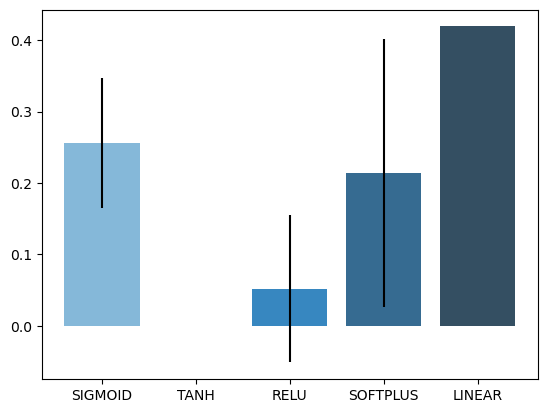

In [4]:
plt.bar([el[0][1].name for el in params['hidden_layers']], res["tr_error_mean"], yerr = res["tr_error_std"], color = sns.color_palette("Blues_d", len(params['hidden_layers'])))
plt.title("DENSE train error over hidden functions")
plt.show()

Same tests with linear output activation function

Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs


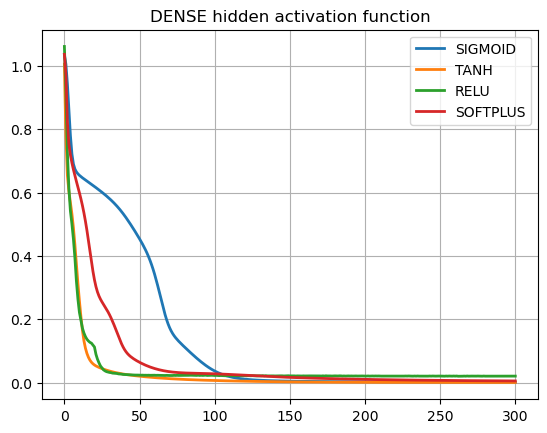

In [13]:
var_parameter = [[(5,ActivationFunction.SIGMOID)],[(5,ActivationFunction.TANH)],[(5,ActivationFunction.RELU)],[(5,ActivationFunction.SOFTPLUS)],[(5,ActivationFunction.LINEAR)]]
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : var_parameter,
    'output_function': [ActivationFunction.LINEAR],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'seed': [1],
    'regularization': [0],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['hidden_layers']
    return f[0][1].name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
run_metadata = mt.get_run_metadata()
# focus on low values to better see the differences
plot_utility.plot_multiple_learning_curves("DENSE hidden activation function",run_metadata,tr_error_list)
for i in range(len(var_parameter)):
    print("{} val error {:.3f} score {:.3f}".format(var_parameter[i][0][1].name,val_error_list[i][-1],val_score_list[i][-1]))

In [31]:
var_parameter = [[(5,ActivationFunction.SIGMOID)],[(5,ActivationFunction.TANH)],[(5,ActivationFunction.RELU)],[(5,ActivationFunction.SOFTPLUS)],[(5,ActivationFunction.LINEAR)]]
RUN_COUNT = 5
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : var_parameter,
    'output_function': [ActivationFunction.LINEAR],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'seed': [i for i in range(RUN_COUNT)],
    'regularization': [0],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['hidden_layers']
    return f[0][1].name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()

Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs
Reached max number of epochs


In [ ]:
res = mt.sensitivity_analysis(["hidden_layers"])
res

{'tr_error_mean': array([0.00124228, 0.00127742, 0.00405621, 0.00243608, 0.67223248]), 'val_error_mean': array([0.00248468, 0.00622808, 0.01239252, 0.00775783, 0.78766949]), 'tr_score_mean': array([1.        , 1.        , 1.        , 1.        , 0.78225806]), 'val_score_mean': array([1.        , 1.        , 1.        , 1.        , 0.71527778]), 'tr_error_std': array([0.0004298 , 0.00222977, 0.00811067, 0.00140369, 0.02500463]), 'val_error_std': array([0.00094602, 0.00795027, 0.02415865, 0.00754973, 0.01991162]), 'tr_score_std': array([0.        , 0.        , 0.        , 0.        , 0.02885249]), 'val_score_std': array([0.        , 0.        , 0.        , 0.        , 0.02986021]), 'global_tr_error_mean': 0.13624889478802363, 'global_val_error_mean': 0.1633065211020961, 'global_tr_score_mean': 0.9564516129032258, 'global_val_score_mean': 0.9430555555555555, 'global_tr_error_std': 0.26825413637054774, 'global_val_error_std': 0.3125501778506961, 'global_tr_score_std': 0.08804738105778182, 

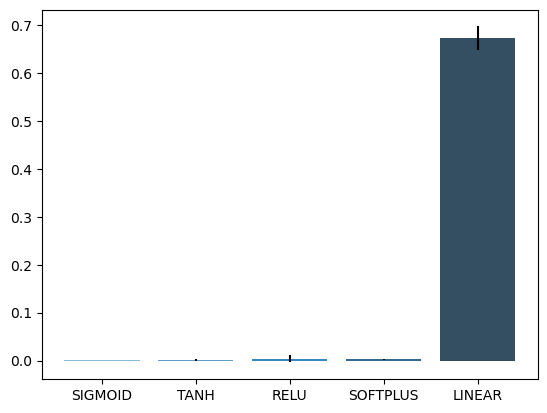

In [32]:
plt.bar([el[0][1].name for el in params['hidden_layers']], res["tr_error_mean"], yerr = res["tr_error_std"], color = sns.color_palette("Blues_d", len(params['hidden_layers'])))
plt.title("DENSE train error over hidden functions")
plt.show()

<h2>DENSE con differenti funzioni di attivazione nello strato di output</h2>

Reached max number of epochs
Reached max number of epochs


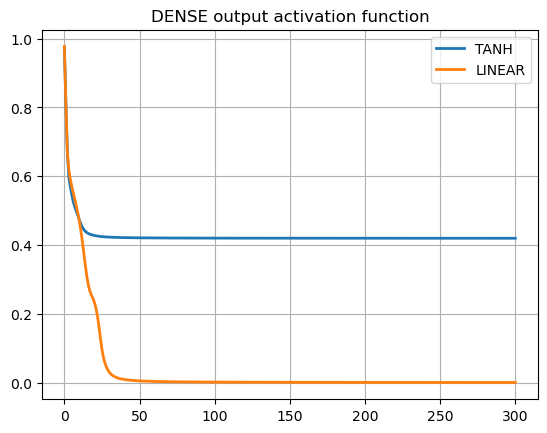

TANH   val error 0.667 score 0.833
LINEAR val error 0.000 score 1.000


In [29]:
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : [[(5,ActivationFunction.TANH)]],
    'output_function': [ActivationFunction.TANH, ActivationFunction.LINEAR],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'regularization': [0],
    'seed': [0],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['output_function']
    return f.name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
run_metadata = mt.get_run_metadata()
plot_utility.plot_multiple_learning_curves("DENSE output activation function",run_metadata,tr_error_list)
print("TANH   val error {:.3f} score {:.3f}".format(val_error_list[0][-1],val_score_list[0][-1]))
print("LINEAR val error {:.3f} score {:.3f}".format(val_error_list[1][-1],val_score_list[1][-1]))


Reached max number of epochs
Reached max number of epochs


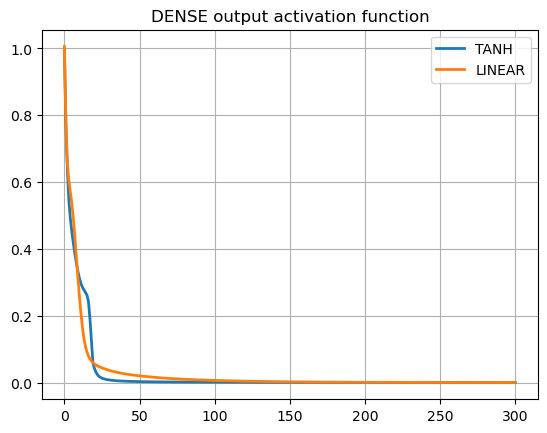

TANH   val error 0.004 score 1.000
LINEAR val error 0.010 score 1.000


In [30]:
params = {
    'input_units' : [X.shape[1]],
    'output_units' : [y.shape[1]],
    'hidden_layers' : [[(5,ActivationFunction.TANH)]],
    'output_function': [ActivationFunction.TANH, ActivationFunction.LINEAR],
    "momentum" : [0.9],
    'learning_rate': [0.3],
    'regularization': [0],
    'seed': [1],
    'epochs' : [300],
    'val_X' : [val_X],
    'val_y' : [val_y],
    "score_function" : [score_function]
}

def run_name_function(theta, tr_error, val_error, tr_score, val_score):
    f = theta['output_function']
    return f.name

mt = ModelDataCollector(DENSE, X, y, params)
mt.gather_data(run_name_function)
tr_error_list,val_error_list = mt.get_error_curve()
tr_score_list, val_score_list = mt.get_score_curve()
run_metadata = mt.get_run_metadata()
plot_utility.plot_multiple_learning_curves("DENSE output activation function",run_metadata,tr_error_list)
print("TANH   val error {:.3f} score {:.3f}".format(val_error_list[0][-1],val_score_list[0][-1]))
print("LINEAR val error {:.3f} score {:.3f}".format(val_error_list[1][-1],val_score_list[1][-1]))
